# Ayush Goyal
## 101903749
## COE29

## Prediction in time series dataset




In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
import math
from sklearn.ensemble import RandomForestRegressor

In [22]:
dataset = pd.read_excel('DATASET.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [23]:
dataset.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [24]:
# Manually added row 10 in Section 92 as earlier only 9 rows were present

In [25]:
#Proving each section with similar section name
j = 0
for i in range(100):
    dataset.iloc[j:j + 10, 0] = dataset.iloc[j, 0]
    j += 10

In [27]:
dataset.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [28]:
dataset.columns = dataset.columns.str.replace('Unnamed: 0', 'Section')

In [29]:
dataset.fillna(0, inplace=True)

In [31]:
#Test Dataset
test_dataset = dataset.loc[dataset['year'] == 10]
test_dataset.head(15)

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
59,Sec_6,10,320.0,240.2,22.1,0.0,3,104,7600,3300,1.0,185.6,39.0,33,1.107
69,Sec_7,10,264.2,231.7,13.4,4.5,6,0,4300,1300,0.0,246.9,48.0,176,3.164
79,Sec_8,10,505.6,198.0,22.5,0.0,4,104,12159,7469,0.0,305.0,12.0,7,0.746
89,Sec_9,10,520.7,195.8,22.9,0.0,3,100,12284,7546,0.0,311.3,6.0,8,0.859
99,Sec_10,10,520.7,77.1,22.4,0.0,4,106,7700,3300,92.9,67.7,0.0,6,1.839


In [32]:
model = ExtraTreesRegressor(n_estimators=200,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1000,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=123, verbose=0,
                    warm_start=False)

In [38]:
lst = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [39]:
res = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [40]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [41]:
def selectedModel(val):
    RMSE = []
    N = 0
    index = 0
    #For Applying ExtraTreesRegressor
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                #Applying Random Forest 
                model.fit(xtrain, ytrain)

                #Predicting Values
                ypred = model.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                res[lst[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
            
    #For Applying Random Forest    
    else:
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                #Applying Random Forest 
                rf.fit(xtrain, ytrain)

                #Predicting Values
                ypred = rf.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                res[lst[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
    return (RMSE, count)

In [42]:
#Applying Random Forest
result_RMSE, result_count = selectedModel(1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

In [43]:
dataset_predicted = pd.DataFrame.from_dict(res)
dataset_predicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.5015,53.0868,37.335,7.579,1.892430
1,56.0135,27.8117,0.885,7.610,0.788332
2,64.2127,0.0000,0.000,11.257,1.361942
3,15.9736,53.1660,57.167,6.998,1.797542
4,0.0000,247.1847,33.835,5.890,1.678023
...,...,...,...,...,...
95,0.0000,109.9675,14.688,3.664,1.353677
96,163.9678,176.6288,8.830,7.289,1.503908
97,4.0836,57.8961,21.501,11.673,1.064197
98,96.5461,55.9914,12.140,10.738,0.889464


In [44]:
#RMSE for each column
for i in result_RMSE:
    print((i/result_count)**0.5)

69.13927337359357
67.6571262677001
27.93206290346991
15.01123515970621
0.24427625411571685


In [45]:
#Selecting random 40 rows
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))

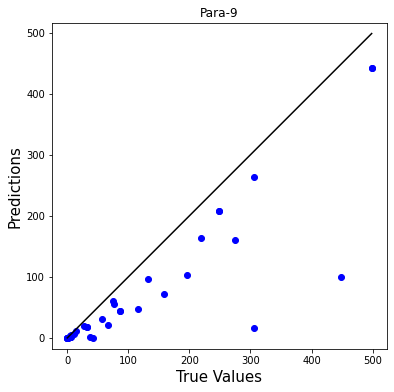

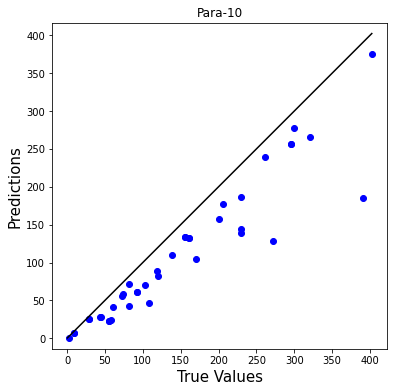

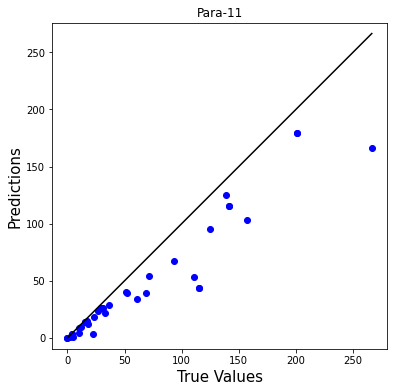

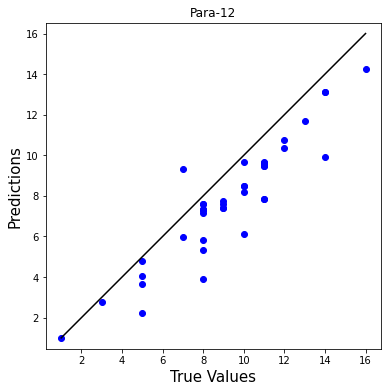

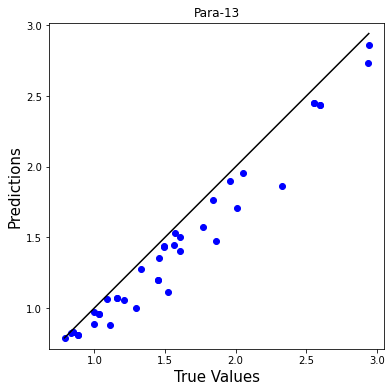

In [49]:
#Scatter plot for random 40 rows out of 100 for each target column
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_dataset.iloc[ind, i+10]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='blue')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'k-')
    plt.title(lst[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

In [50]:
result_RMSE, result_count = selectedModel(0)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated 

In [51]:
dataset_predicted = pd.DataFrame.from_dict(res)
dataset_predicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.5015,53.0868,37.335,7.579,1.892430
1,56.0135,27.8117,0.885,7.610,0.788332
2,64.2127,0.0000,0.000,11.257,1.361942
3,15.9736,53.1660,57.167,6.998,1.797542
4,0.0000,247.1847,33.835,5.890,1.678023
...,...,...,...,...,...
195,0.0000,130.0630,15.505,3.870,1.402340
196,183.6360,189.4390,9.875,7.910,1.550945
197,4.9760,69.9840,23.500,11.960,1.075742
198,114.5970,64.7870,14.055,11.565,0.963970


In [52]:
#RMSE for each column
for i in result_RMSE:
    print((i/result_count)**0.5)

60.937774174086385
62.6895896639745
25.61212121759929
14.503411262527166
0.253774471986373


In [53]:
#Selecting random 40 rows
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))

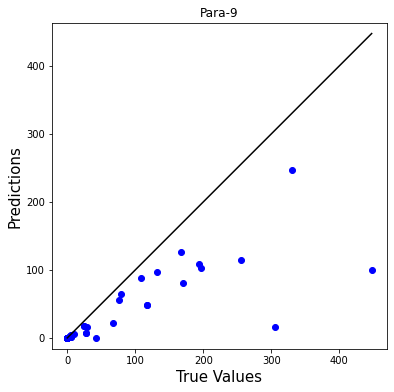

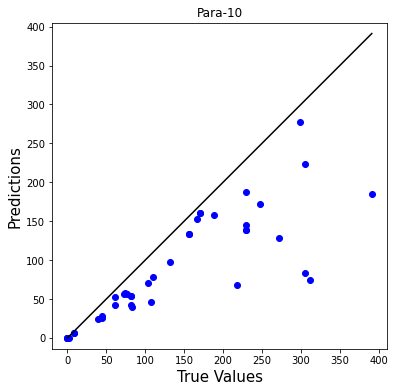

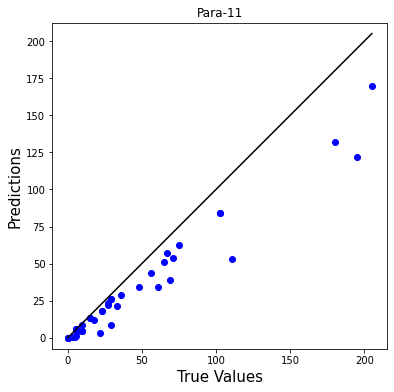

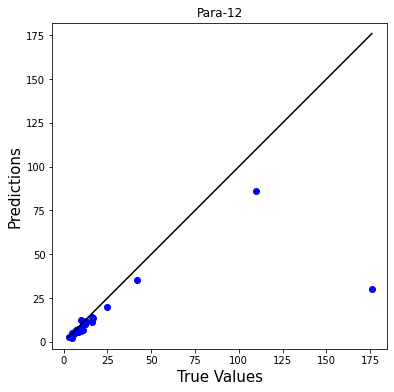

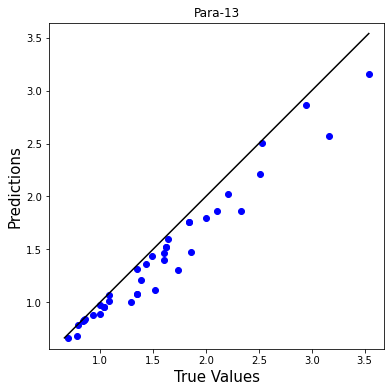

In [54]:
#Scatter plot for random 40 rows out of 100 for each target column
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_dataset.iloc[ind, i+10]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='blue')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'k-')
    plt.title(lst[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()